<a href="https://colab.research.google.com/github/ysimonov/TensorFlow-Developer-Certificate-Course-Udemy/blob/main/01_tensorflow_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction to Regression with Neural Networks in Tensorflow

Regression problem: predicting a number based on other (input) numbers.

In [3]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2.8.2


### Creating some data for view and fit

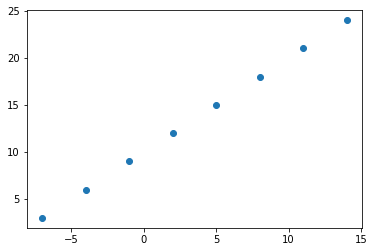

In [6]:
# Create features
X = np.array([-7, -4, -1, 2, 5, 8, 11, 14], dtype=np.float32)

# Create labels
y = np.array([3, 6, 9, 12, 15, 18, 21, 24], dtype=np.float32)

# Visualize data
plt.scatter(X, y)

In [9]:
# Relationship that neural network should learn
y == X + 10

array([ True,  True,  True,  True,  True,  True,  True,  True])

### Input and Output shapes

In [10]:
# Create a demo tensor for price prediction problem
house_info = tf.constant(["bedroom", "bathroom", "garage"])
house_price = tf.constant([939700])
house_info, house_price

(<tf.Tensor: shape=(3,), dtype=string, numpy=array([b'bedroom', b'bathroom', b'garage'], dtype=object)>,
 <tf.Tensor: shape=(1,), dtype=int32, numpy=array([939700], dtype=int32)>)

In [11]:
input_shape = X.shape
output_shape = y.shape
input_shape, output_shape

((8,), (8,))

In [12]:
# Turn Numpy arrays into tensors
X = tf.constant(X)
y = tf.constant(y)
X, y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [13]:
input_shape = X[0].shape
output_shape = y[0].shape
input_shape, output_shape

(TensorShape([]), TensorShape([]))

### Steps in modelling with TensorFlow

1. **Creating a model** - define the input and output layers, as well as the hidden layers
2. **Compiling a model** - define the loss function (in other words, the function that tells how wrong prediction of the model is relative to desired outputs),
and the optimizer (tells our model to improve patterns its learning) and evaluate metrics (what can be used to interpret the performance of the model)
3. **Fitting a model** - letting the model try to find patterns between X and y (features and labels)

### Summary of Required Steps
* Get data ready (turn it into tensors)
* Build or pick a pretrained model
* Fit the model to the data and make a prediction
* Evaluate the model
* Improve through experimentation
* Save and reload trained model

### Defining a Simple Linear Regression Model

In [17]:
# Set random seed
tf.random.set_seed(42)

# 1. Create a model using the Sequential API
model = tf.keras.Sequential([
  tf.keras.layers.Dense(1)
])

# 2. Compile the model
model.compile(
    loss=tf.keras.losses.mae, # Mean Absolute Error
    optimizer=tf.keras.optimizers.SGD(), # Stochastic Gradient Descent
    metrics=["mae"] # can use string instead of tf.keras.losses.mae
)

# 3. Fit the model
# tf.expand_dims is used to convert (n,) into (n, 1) shape
model.fit(tf.expand_dims(X, axis=-1), y, epochs=5)

Epoch 1/5
1/1 [==============================] - 1s 1s/step - loss: 11.5048 - mae: 11.5048
Epoch 2/5
1/1 [==============================] - 0s 19ms/step - loss: 11.3723 - mae: 11.3723
Epoch 3/5
1/1 [==============================] - 0s 19ms/step - loss: 11.2398 - mae: 11.2398
Epoch 4/5
1/1 [==============================] - 0s 19ms/step - loss: 11.1073 - mae: 11.1073
Epoch 5/5
1/1 [==============================] - 0s 28ms/step - loss: 10.9748 - mae: 10.9748


In [18]:
# Check out X and y
X, y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [20]:
# Try to make a prediction using trained model
y_pred = model.predict([17.0])
y_pred

array([[12.716021]], dtype=float32)

In [22]:
# mae is ~11 (or more) off on average from desired values, 
# hence prediction is not accurate
y_pred + 11

array([[23.71602]], dtype=float32)

### Improving a Model

The model can be improved by altering the steps, such as:

1. **Creating a model** - add more layers, increase number of hidden units (neurons within hidden layers), change activation function of each layer.
2. **Compiling a model** - here we might change the optimization function or **learning rate** of the optimization function.
3. **Fitting a model** - here we might fit a model for more **epochs** (train for longer), or give the model more examples to learn from.

### Improve model predictions by altering number of epochs

In [24]:
# Let's rebuild the model

# 1. Create the model
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(1))

# 2. Compile the model
model.compile(
    loss="mae",
    optimizer="sgd",
    metrics=["mae"]
)

# 3. Train the model
model.fit(tf.expand_dims(X, axis=-1), y, epochs=100)

Epoch 1/100
1/1 [==============================] - 0s 455ms/step - loss: 11.2219 - mae: 11.2219
Epoch 2/100
1/1 [==============================] - 0s 13ms/step - loss: 11.0894 - mae: 11.0894
Epoch 3/100
1/1 [==============================] - 0s 11ms/step - loss: 10.9569 - mae: 10.9569
Epoch 4/100
1/1 [==============================] - 0s 8ms/step - loss: 10.8244 - mae: 10.8244
Epoch 5/100
1/1 [==============================] - 0s 9ms/step - loss: 10.6919 - mae: 10.6919
Epoch 6/100
1/1 [==============================] - 0s 19ms/step - loss: 10.5594 - mae: 10.5594
Epoch 7/100
1/1 [==============================] - 0s 12ms/step - loss: 10.4269 - mae: 10.4269
Epoch 8/100
1/1 [==============================] - 0s 22ms/step - loss: 10.2944 - mae: 10.2944
Epoch 9/100
1/1 [==============================] - 0s 15ms/step - loss: 10.1619 - mae: 10.1619
Epoch 10/100
1/1 [==============================] - 0s 13ms/step - loss: 10.0294 - mae: 10.0294
Epoch 11/100
1/1 [==============================] 

In [25]:
# Remind ourselves of the data
X, y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [26]:
# Let's see if our model's prediction has improved
model.predict([17.0])

array([[29.739855]], dtype=float32)

### See the effect of changing optimizer from SGD to Adam

In [27]:
# Let's rebuild the model

# 1. Create the model
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(1))

# 2. Compile the model
model.compile(
    loss="mae",
    optimizer="adam",
    metrics=["mae"]
)

# 3. Train the model
model.fit(tf.expand_dims(X, axis=-1), y, epochs=100)

Epoch 1/100
1/1 [==============================] - 0s 332ms/step - loss: 10.5736 - mae: 10.5736
Epoch 2/100
1/1 [==============================] - 0s 12ms/step - loss: 10.5691 - mae: 10.5691
Epoch 3/100
1/1 [==============================] - 0s 14ms/step - loss: 10.5646 - mae: 10.5646
Epoch 4/100
1/1 [==============================] - 0s 22ms/step - loss: 10.5601 - mae: 10.5601
Epoch 5/100
1/1 [==============================] - 0s 13ms/step - loss: 10.5556 - mae: 10.5556
Epoch 6/100
1/1 [==============================] - 0s 8ms/step - loss: 10.5511 - mae: 10.5511
Epoch 7/100
1/1 [==============================] - 0s 14ms/step - loss: 10.5466 - mae: 10.5466
Epoch 8/100
1/1 [==============================] - 0s 15ms/step - loss: 10.5421 - mae: 10.5421
Epoch 9/100
1/1 [==============================] - 0s 13ms/step - loss: 10.5376 - mae: 10.5376
Epoch 10/100
1/1 [==============================] - 0s 11ms/step - loss: 10.5331 - mae: 10.5331
Epoch 11/100
1/1 [==============================]

### Although Adam Optimizer is more stable, SGD provides much faster convergence. 

### Try increasing the number of hidden layers and neurons per layer

In [48]:
# 1. Create a bigger model
model = tf.keras.Sequential([
  tf.keras.layers.Dense(100, activation="relu"),
  tf.keras.layers.Dense(100, activation="relu"),
  tf.keras.layers.Dense(100, activation="relu"),
  tf.keras.layers.Dense(1)                            
])

# 2. Compile the model
model.compile(
    loss="mae",
    optimizer=tf.keras.optimizers.SGD(lr=0.002),
    metrics=["mae"]
)

# 3. Fit the model
model.fit(tf.expand_dims(X, axis=-1), y, epochs=100)

Epoch 1/100


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


1/1 [==============================] - 0s 401ms/step - loss: 12.9169 - mae: 12.9169
Epoch 2/100
1/1 [==============================] - 0s 7ms/step - loss: 12.7751 - mae: 12.7751
Epoch 3/100
1/1 [==============================] - 0s 6ms/step - loss: 12.6358 - mae: 12.6358
Epoch 4/100
1/1 [==============================] - 0s 6ms/step - loss: 12.4952 - mae: 12.4952
Epoch 5/100
1/1 [==============================] - 0s 6ms/step - loss: 12.3569 - mae: 12.3569
Epoch 6/100
1/1 [==============================] - 0s 7ms/step - loss: 12.2154 - mae: 12.2154
Epoch 7/100
1/1 [==============================] - 0s 6ms/step - loss: 12.0733 - mae: 12.0733
Epoch 8/100
1/1 [==============================] - 0s 6ms/step - loss: 11.9301 - mae: 11.9301
Epoch 9/100
1/1 [==============================] - 0s 6ms/step - loss: 11.7896 - mae: 11.7896
Epoch 10/100
1/1 [==============================] - 0s 8ms/step - loss: 11.6497 - mae: 11.6497
Epoch 11/100
1/1 [==============================] - 0s 6ms/step - los

In [49]:
model.predict([17.])

array([[31.839039]], dtype=float32)

### Try switching to Adam optimizer

In [53]:
# 1. Create a bigger model
model = tf.keras.Sequential([
  tf.keras.layers.Dense(100, activation="relu"),
  tf.keras.layers.Dense(100, activation="relu"),
  tf.keras.layers.Dense(100, activation="relu"),
  tf.keras.layers.Dense(1)                            
])

# 2. Compile the model
model.compile(
    loss="mae",
    optimizer=tf.keras.optimizers.Adam(lr=0.005),
    metrics=["mae"]
)

# 3. Fit the model
model.fit(tf.expand_dims(X, axis=-1), y, epochs=100)

Epoch 1/100


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


1/1 [==============================] - 0s 488ms/step - loss: 14.1843 - mae: 14.1843
Epoch 2/100
1/1 [==============================] - 0s 9ms/step - loss: 12.3379 - mae: 12.3379
Epoch 3/100
1/1 [==============================] - 0s 10ms/step - loss: 10.9061 - mae: 10.9061
Epoch 4/100
1/1 [==============================] - 0s 11ms/step - loss: 9.6553 - mae: 9.6553
Epoch 5/100
1/1 [==============================] - 0s 11ms/step - loss: 8.1725 - mae: 8.1725
Epoch 6/100
1/1 [==============================] - 0s 13ms/step - loss: 6.3593 - mae: 6.3593
Epoch 7/100
1/1 [==============================] - 0s 11ms/step - loss: 4.2103 - mae: 4.2103
Epoch 8/100
1/1 [==============================] - 0s 12ms/step - loss: 4.5896 - mae: 4.5896
Epoch 9/100
1/1 [==============================] - 0s 11ms/step - loss: 5.5020 - mae: 5.5020
Epoch 10/100
1/1 [==============================] - 0s 9ms/step - loss: 5.7035 - mae: 5.7035
Epoch 11/100
1/1 [==============================] - 0s 8ms/step - loss: 5.41

In [55]:
model.predict([17.])

array([[29.07331]], dtype=float32)